# EDA for Login Data #

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import data
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#Group data into 15-minute increments
df = df.resample('15T',on='login_time').count().rename(columns={'login_time':'login_count'}).reset_index()
df.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


<AxesSubplot:xlabel='login_time', ylabel='login_count'>

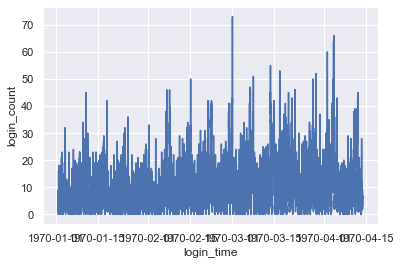

In [4]:
#Line chart for raw data
sns.set()
sns.lineplot(x='login_time', y='login_count', data=df)

<AxesSubplot:xlabel='login_count'>

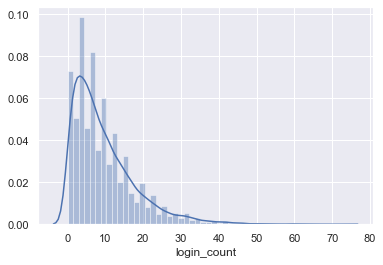

In [5]:
#Distribution of raw data
sns.distplot(df.login_count)

<AxesSubplot:xlabel='login_count'>

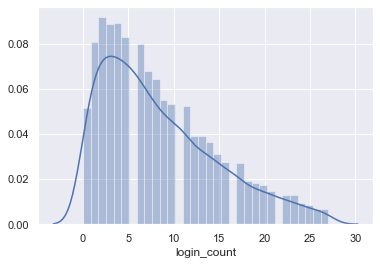

In [6]:
#Eliminate outliers
df = df[df.login_count < df.login_count.quantile(.96)]
sns.distplot(df.login_count)

In [7]:
#Add datetime features
df['Year'] = df.login_time.dt.year
df['Month'] = df.login_time.dt.month
df['Day'] = df.login_time.dt.day
df['Hour'] = df.login_time.dt.hour
df['Minute'] = df.login_time.dt.minute
df.head()

,login_time,login_count,Year,Month,Day,Hour,Minute
0,1970-01-01 20:00:00,2,1970,1,1,20,0
1,1970-01-01 20:15:00,6,1970,1,1,20,15
2,1970-01-01 20:30:00,9,1970,1,1,20,30
3,1970-01-01 20:45:00,7,1970,1,1,20,45
4,1970-01-01 21:00:00,1,1970,1,1,21,0


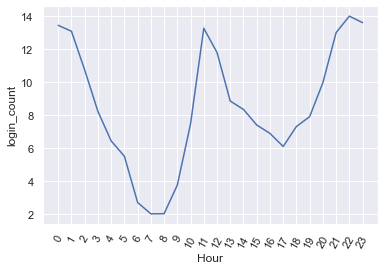

In [8]:
#Examine at average logins by hour of day
df_hours = df.groupby('Hour').mean().reset_index()
sns.lineplot(x='Hour',y='login_count', data=df_hours)
plt.xticks(np.arange(24), np.arange(24), rotation=60)
plt.show()

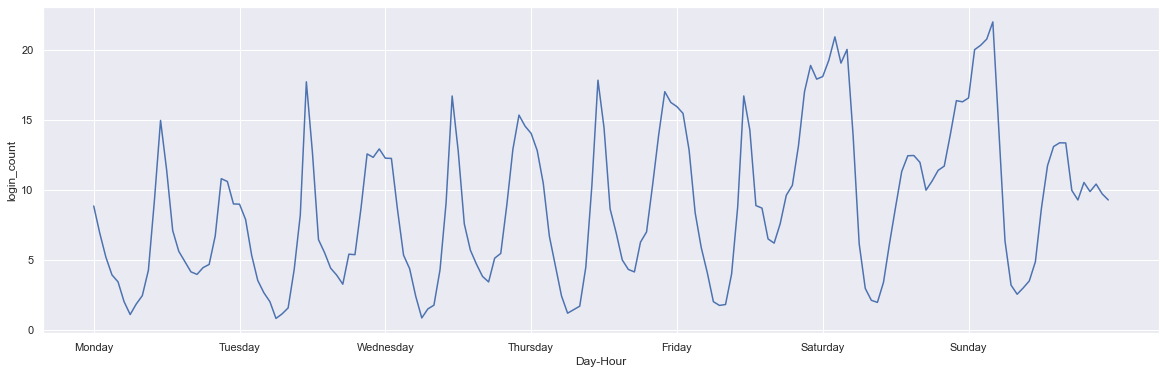

In [11]:
#Examine average logins by hour of day and day of week
df['Day of Week'] = df.login_time.dt.day_name()
df['Weekday']=df.login_time.dt.weekday
df['Day-Hour'] = df['Weekday'] + (df['Hour']/24)
df_weekday = df.groupby(['Day of Week','Hour']).mean().reset_index()
plt.figure(figsize=(20,6))
sns.lineplot(x='Day-Hour',y='login_count', data=df_weekday)
plt.xticks(np.arange(7),['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

#### Conclusion ####
With this preliminary exploration, we see that logins peak at 11am and 10pm and gradually increases over the week and through the weekend.